In [1]:
#!/usr/bin/env julia
using ArgParse

using LilGuys
using CairoMakie

using StatsBase
using PythonCall
agama = pyimport("agama")
using Printf
using LinearAlgebra: cross


In [60]:
include(ENV["HOME"] * "/LilGuys.jl/scripts/animate_dm.jl")
include(ENV["HOME"] * "/LilGuys.jl/scripts/project_potential.jl")
include(ENV["HOME"] * "/LilGuys.jl/scripts/project_2d.jl")

LoadError: LoadError: invalid redefinition of constant Main.white
in expression starting at /cosma/home/durham/dc-boye1/LilGuys.jl/scripts/animate_dm.jl:13

In [3]:
modelname = "sculptor/1e7_V31_r3.2/orbit_smallperi"

"sculptor/1e7_V31_r3.2/orbit_smallperi"

In [4]:
cd(ENV["DWARFS_ROOT"] * "/analysis/$modelname")

In [13]:
stars = LilGuys.read_hdf5_table("../stars/exp2d_rs0.08/probabilities_stars.hdf5")

Row,eps,filt,index,mass,probability,psi,psi_nbody,radii
,Float64,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,0.0450292,1,1,4.76409e-8,1.60977e-23,0.0535538,-0.0534707,2.84151
2,0.0122478,1,2,4.76409e-8,2.29717e-168,0.0145623,-0.0145581,25.2014
3,0.0219478,1,3,4.76409e-8,1.9885e-76,0.0447358,-0.0446625,4.24758
4,0.00148633,1,4,4.76409e-8,0.0,0.00305902,-0.00305933,152.447
5,0.0137979,1,5,4.76409e-8,1.77953e-144,0.0145586,-0.0145547,25.2097
6,0.00905055,1,6,4.76409e-8,1.35905e-244,0.0169011,-0.0169015,20.6558
7,0.0188146,1,7,4.76409e-8,3.61681e-95,0.0236172,-0.0236054,12.8215
8,0.0154542,1,8,4.76409e-8,1.85648e-124,0.021758,-0.0217391,14.4752
9,0.00691491,1,9,4.76409e-8,0.0,0.00744882,-0.00744905,57.4369


<output with 213 snapshots of 10000000 particles>

In [15]:
args = Dict()
args["limits"] = 200 .* [-1, 1, -1, 1]
args["n_bins"] = 501
args["skip"] = 20
x_vec = [sind(5), cosd(5), 0]
y_vec = [-sind(5), 0, cosd(5)]

3-element Vector{Float64}:
 -0.08715574274765818
  0.0
  0.9961946980917455

In [16]:
readdir("simulation")

14-element Vector{String}:
 "13813992.out"
 "13814515.out"
 "13820405.out"
 "13823091.out"
 "agama_potential.ini"
 "initial.hdf5"
 "log.out"
 "make_init.sh"
 "orbit.csv"
 "out"
 "param.txt"
 "param.txt-usedvalues"
 "rerun.sh"
 "run.sh"

In [8]:
xbins = LinRange(args["limits"][1], args["limits"][2], args["n_bins"])
ybins = LinRange(args["limits"][3], args["limits"][4], args["n_bins"])
bins = (xbins, ybins)
@assert issorted(xbins) && issorted(ybins)


In [9]:
potential = agama.Potential("simulation/agama_potential.ini")

Python: CompositePotential{ Dehnen, MiyamotoNagai, MiyamotoNagai, NFW } (symmetry: Axisymmetric)

In [10]:
Σ_disk = project_agama_potential(potential, bins, x_vec=x_vec, y_vec=y_vec )
Σ_disk ./= maximum(Σ_disk)

500×500 Matrix{Float64}:
 0.000253573  0.000254538  0.000255506  …  0.000254538  0.000253573
 0.000254538  0.00025551   0.000256486     0.00025551   0.000254538
 0.000255506  0.000256486  0.000257469     0.000256486  0.000255506
 0.000256478  0.000257465  0.000258457     0.000257465  0.000256478
 0.000257453  0.000258448  0.000259447     0.000258448  0.000257453
 0.000258432  0.000259435  0.000260442  …  0.000259435  0.000258432
 0.000259415  0.000260426  0.00026144      0.000260426  0.000259415
 0.000260401  0.000261419  0.000262442     0.000261419  0.000260401
 0.000261391  0.000262417  0.000263447     0.000262417  0.000261391
 0.000262384  0.000263418  0.000264456     0.000263418  0.000262384
 0.000263381  0.000264423  0.000265469  …  0.000264423  0.000263381
 0.000264381  0.000265431  0.000266485     0.000265431  0.000264381
 0.000265384  0.000266443  0.000267505     0.000266443  0.000265384
 ⋮                                      ⋱               
 0.000264381  0.000265431  0.00026

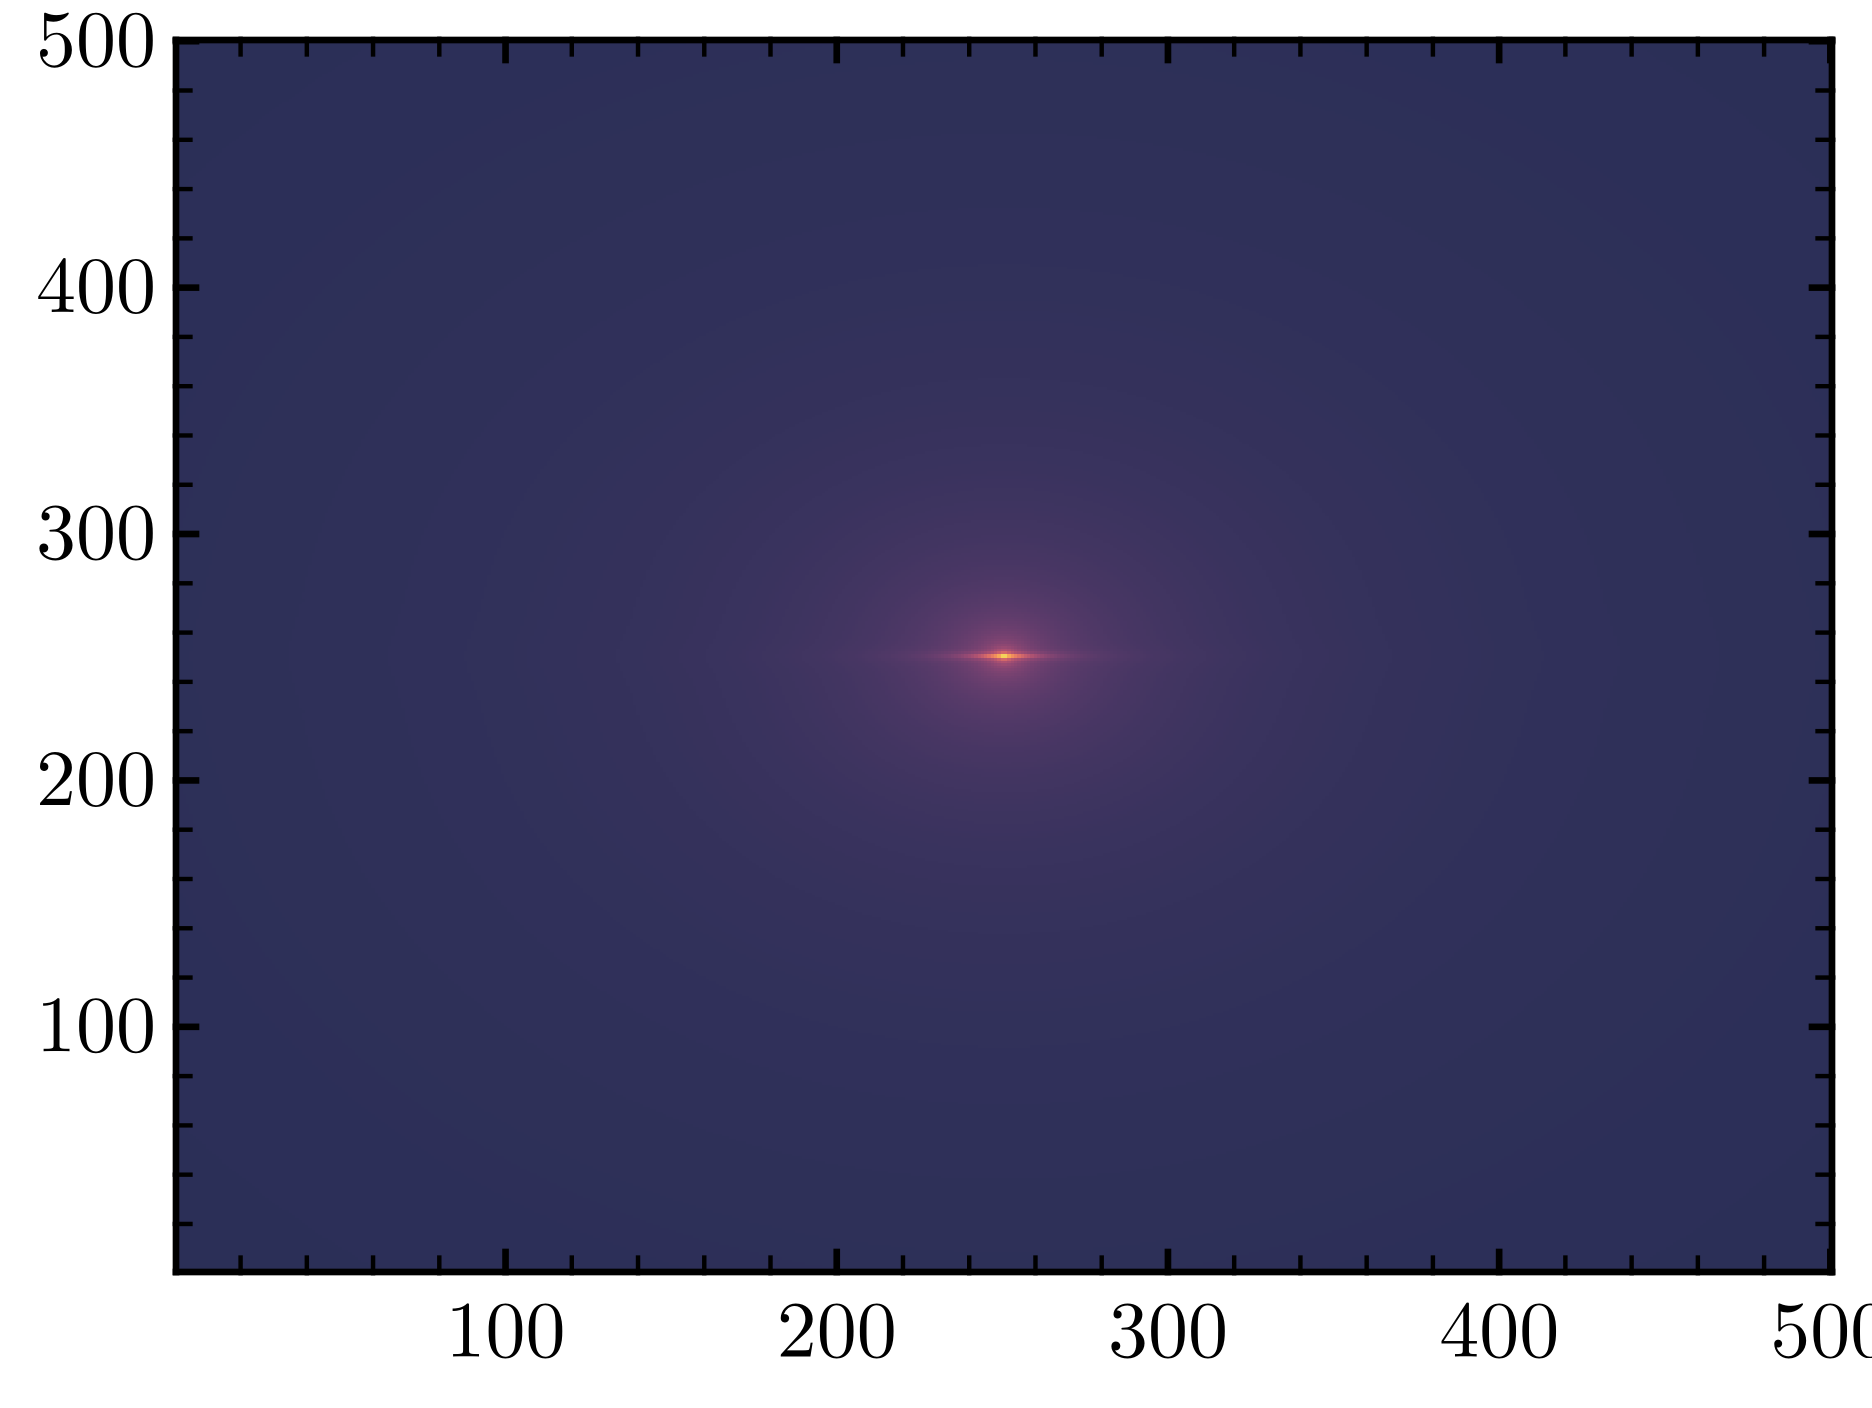

In [11]:
heatmap(sqrt.(Σ_disk))

In [27]:
out = Output(".")


x, y, w = get_xy(out, 1,  x_vec=x_vec, y_vec=y_vec)
h0 = project_points(x, y, w, bins,)
h_scale = maximum(h0)

h0 = h0 ./ h_scale

500×500 Matrix{Float64}:
 9.25009e-6  4.62505e-6  0.0         …  9.25009e-6  1.38751e-5  9.25009e-6
 0.0         0.0         0.0            9.25009e-6  4.62505e-6  0.0
 0.0         0.0         0.0            9.25009e-6  1.85002e-5  4.62505e-6
 0.0         4.62505e-6  0.0            4.62505e-6  9.25009e-6  1.85002e-5
 0.0         0.0         0.0            1.38751e-5  4.62505e-6  9.25009e-6
 0.0         0.0         0.0         …  0.0         0.0         9.25009e-6
 0.0         0.0         4.62505e-6     4.62505e-6  9.25009e-6  4.62505e-6
 4.62505e-6  0.0         0.0            9.25009e-6  4.62505e-6  0.0
 0.0         0.0         4.62505e-6     1.38751e-5  9.25009e-6  4.62505e-6
 0.0         4.62505e-6  4.62505e-6     0.0         0.0         9.25009e-6
 0.0         0.0         0.0         …  2.77503e-5  1.38751e-5  1.85002e-5
 0.0         0.0         4.62505e-6     4.62505e-6  9.25009e-6  4.62505e-6
 0.0         0.0         4.62505e-6     1.38751e-5  9.25009e-6  4.62505e-6
 ⋮            

In [28]:

x, y, w = get_xy(out, 200,  x_vec=x_vec, y_vec=y_vec)
h = project_points(x, y, w, bins,) ./ h_scale

500×500 Matrix{Float64}:
 0.0         9.25009e-6  4.62505e-6  …  0.0         0.0         0.0
 0.0         4.62505e-6  4.62505e-6     0.0         0.0         0.0
 4.62505e-6  0.0         0.0            0.0         0.0         0.0
 0.0         4.62505e-6  4.62505e-6     0.0         0.0         0.0
 0.0         0.0         0.0            0.0         4.62505e-6  0.0
 4.62505e-6  4.62505e-6  4.62505e-6  …  0.0         0.0         0.0
 4.62505e-6  9.25009e-6  0.0            0.0         0.0         0.0
 9.25009e-6  0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         4.62505e-6     0.0         4.62505e-6  0.0
 0.0         4.62505e-6  0.0         …  0.0         0.0         4.62505e-6
 0.0         0.0         0.0            0.0         0.0         0.0
 0.0         0.0         0.0            0.0         0.0         0.0
 ⋮                                   ⋱                          
 0.0         0.0   

In [22]:
out = Output(".", weights=stars.probability)


x, y, w = get_xy(out, 1,  x_vec=x_vec, y_vec=y_vec)
hs_0 = project_points(x, y, w, bins,)
hs_scale = maximum(hs_0)

hs_0 = hs_0 ./ h_scale


x, y, w = get_xy(out, 200,  x_vec=x_vec, y_vec=y_vec)
hs = project_points(x, y, w, bins,)

hs = hs ./ hs_scale

500×500 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

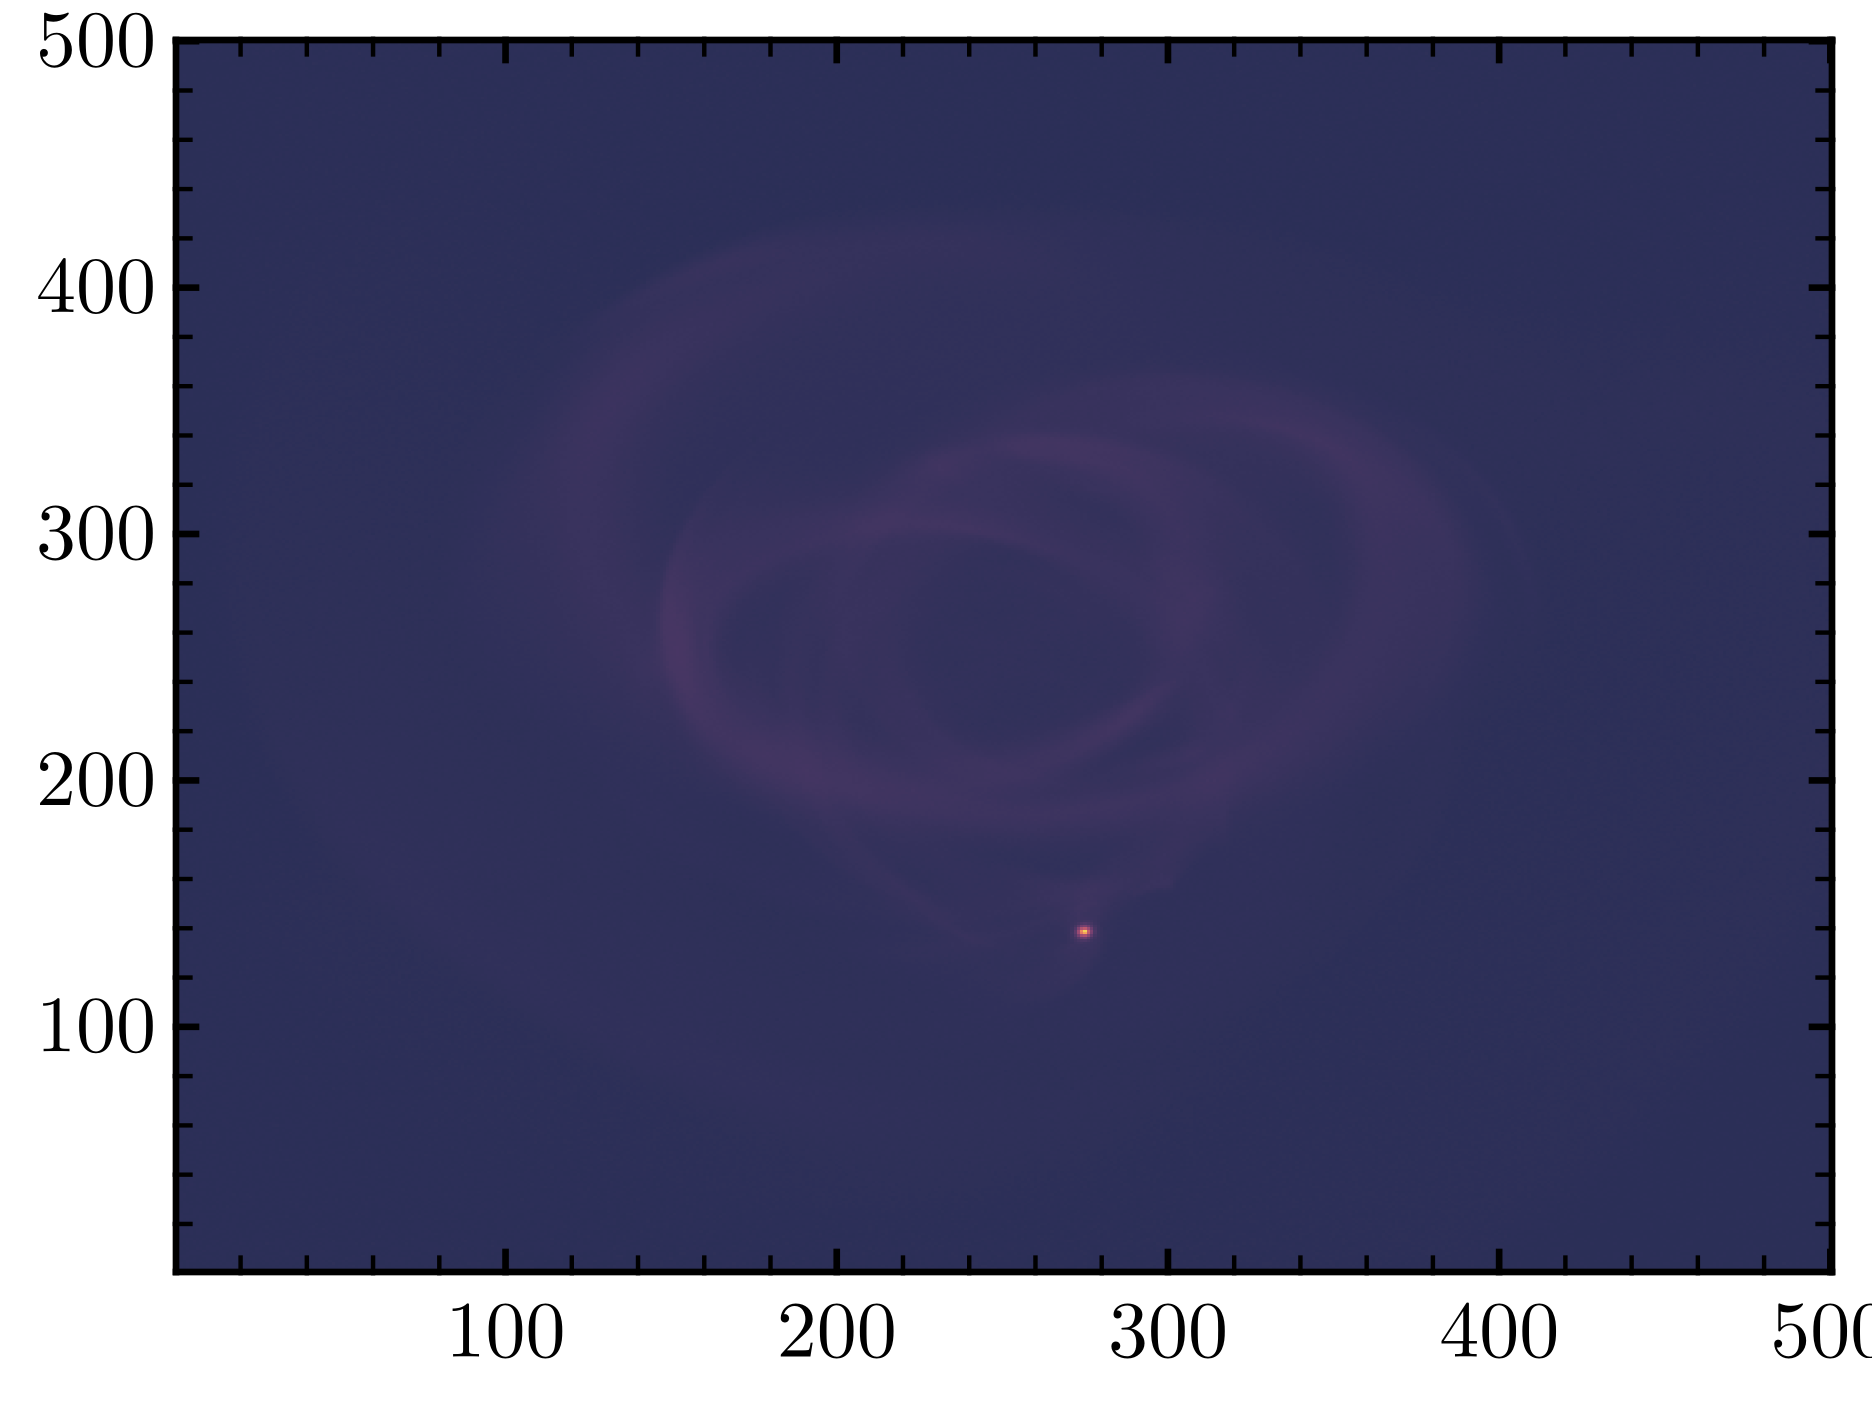

In [29]:
heatmap(sqrt.(h))

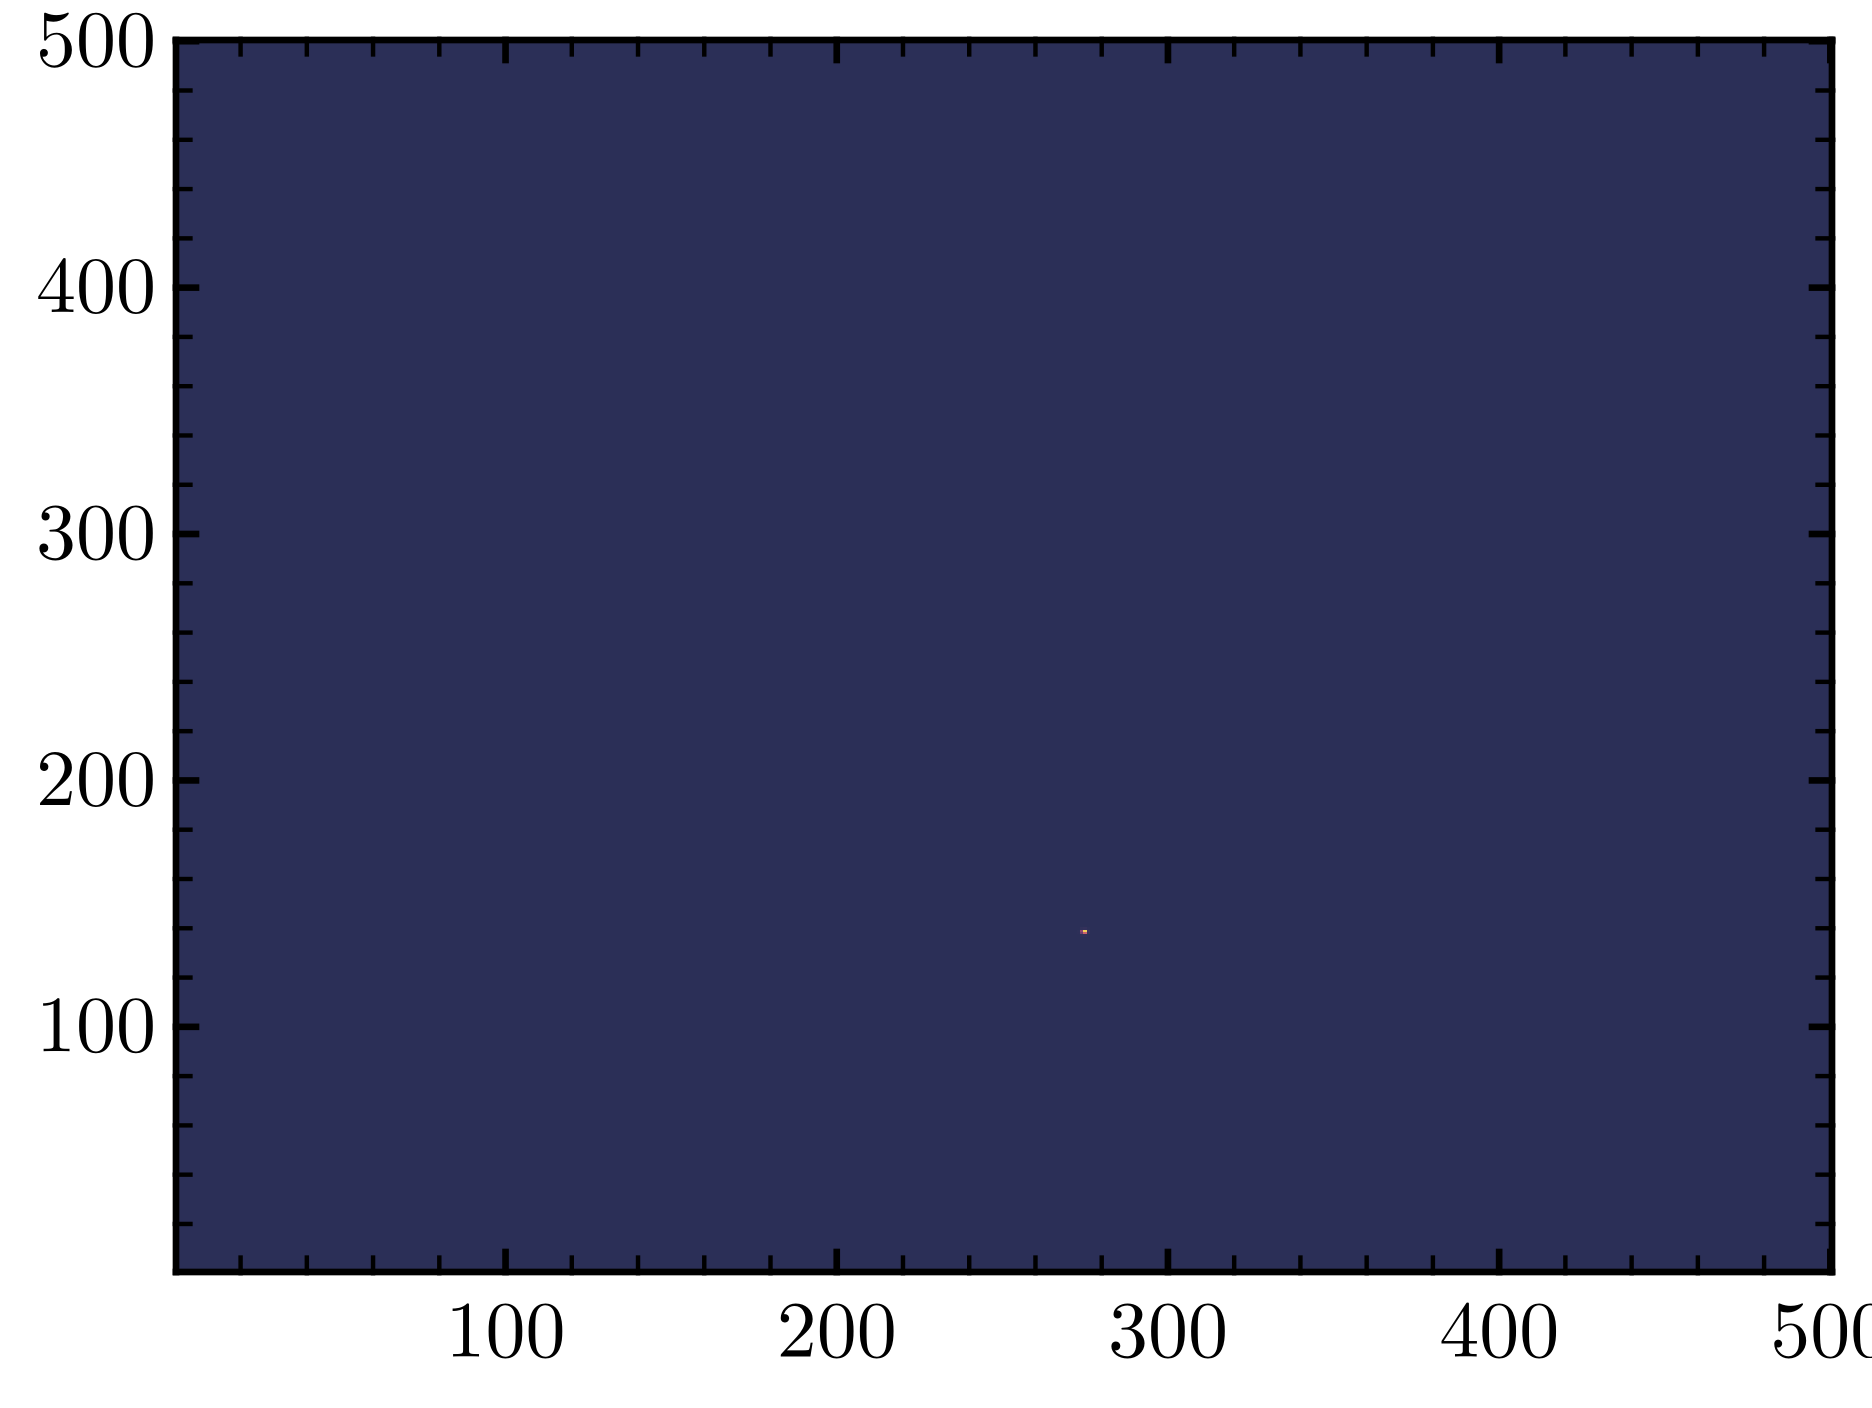

In [30]:
heatmap(sqrt.(hs))

In [35]:
purple

In [38]:
CairoMakie.activate!(type=:png)

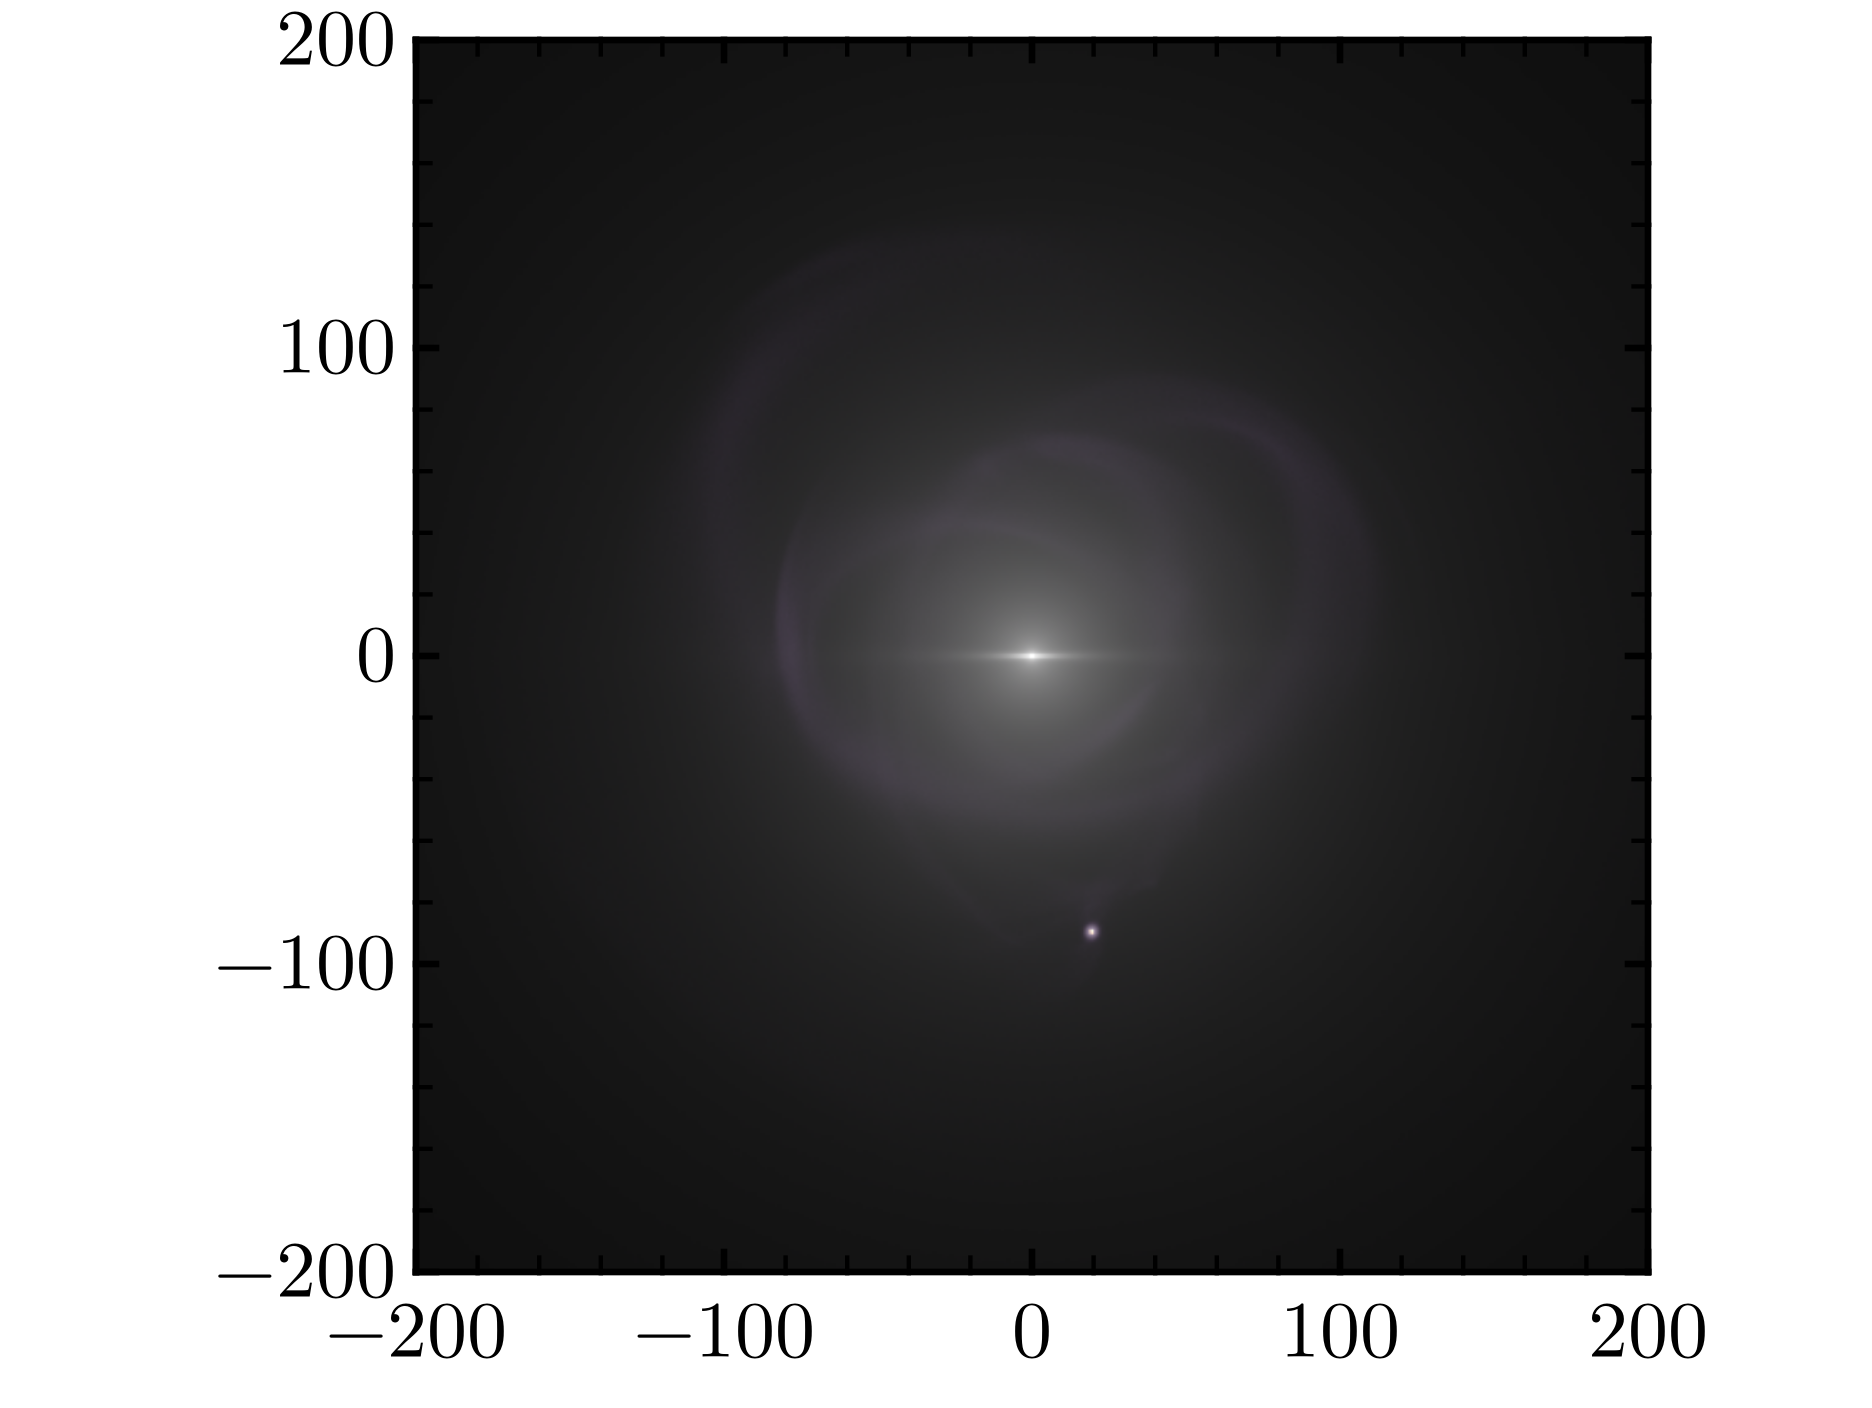

In [52]:
image(extrema(xbins), extrema(ybins), combine_densities([h, Σ_disk, hs], [dm_color, white, orange], dm_power=0.5), axis=(;aspect=DataAspect()))

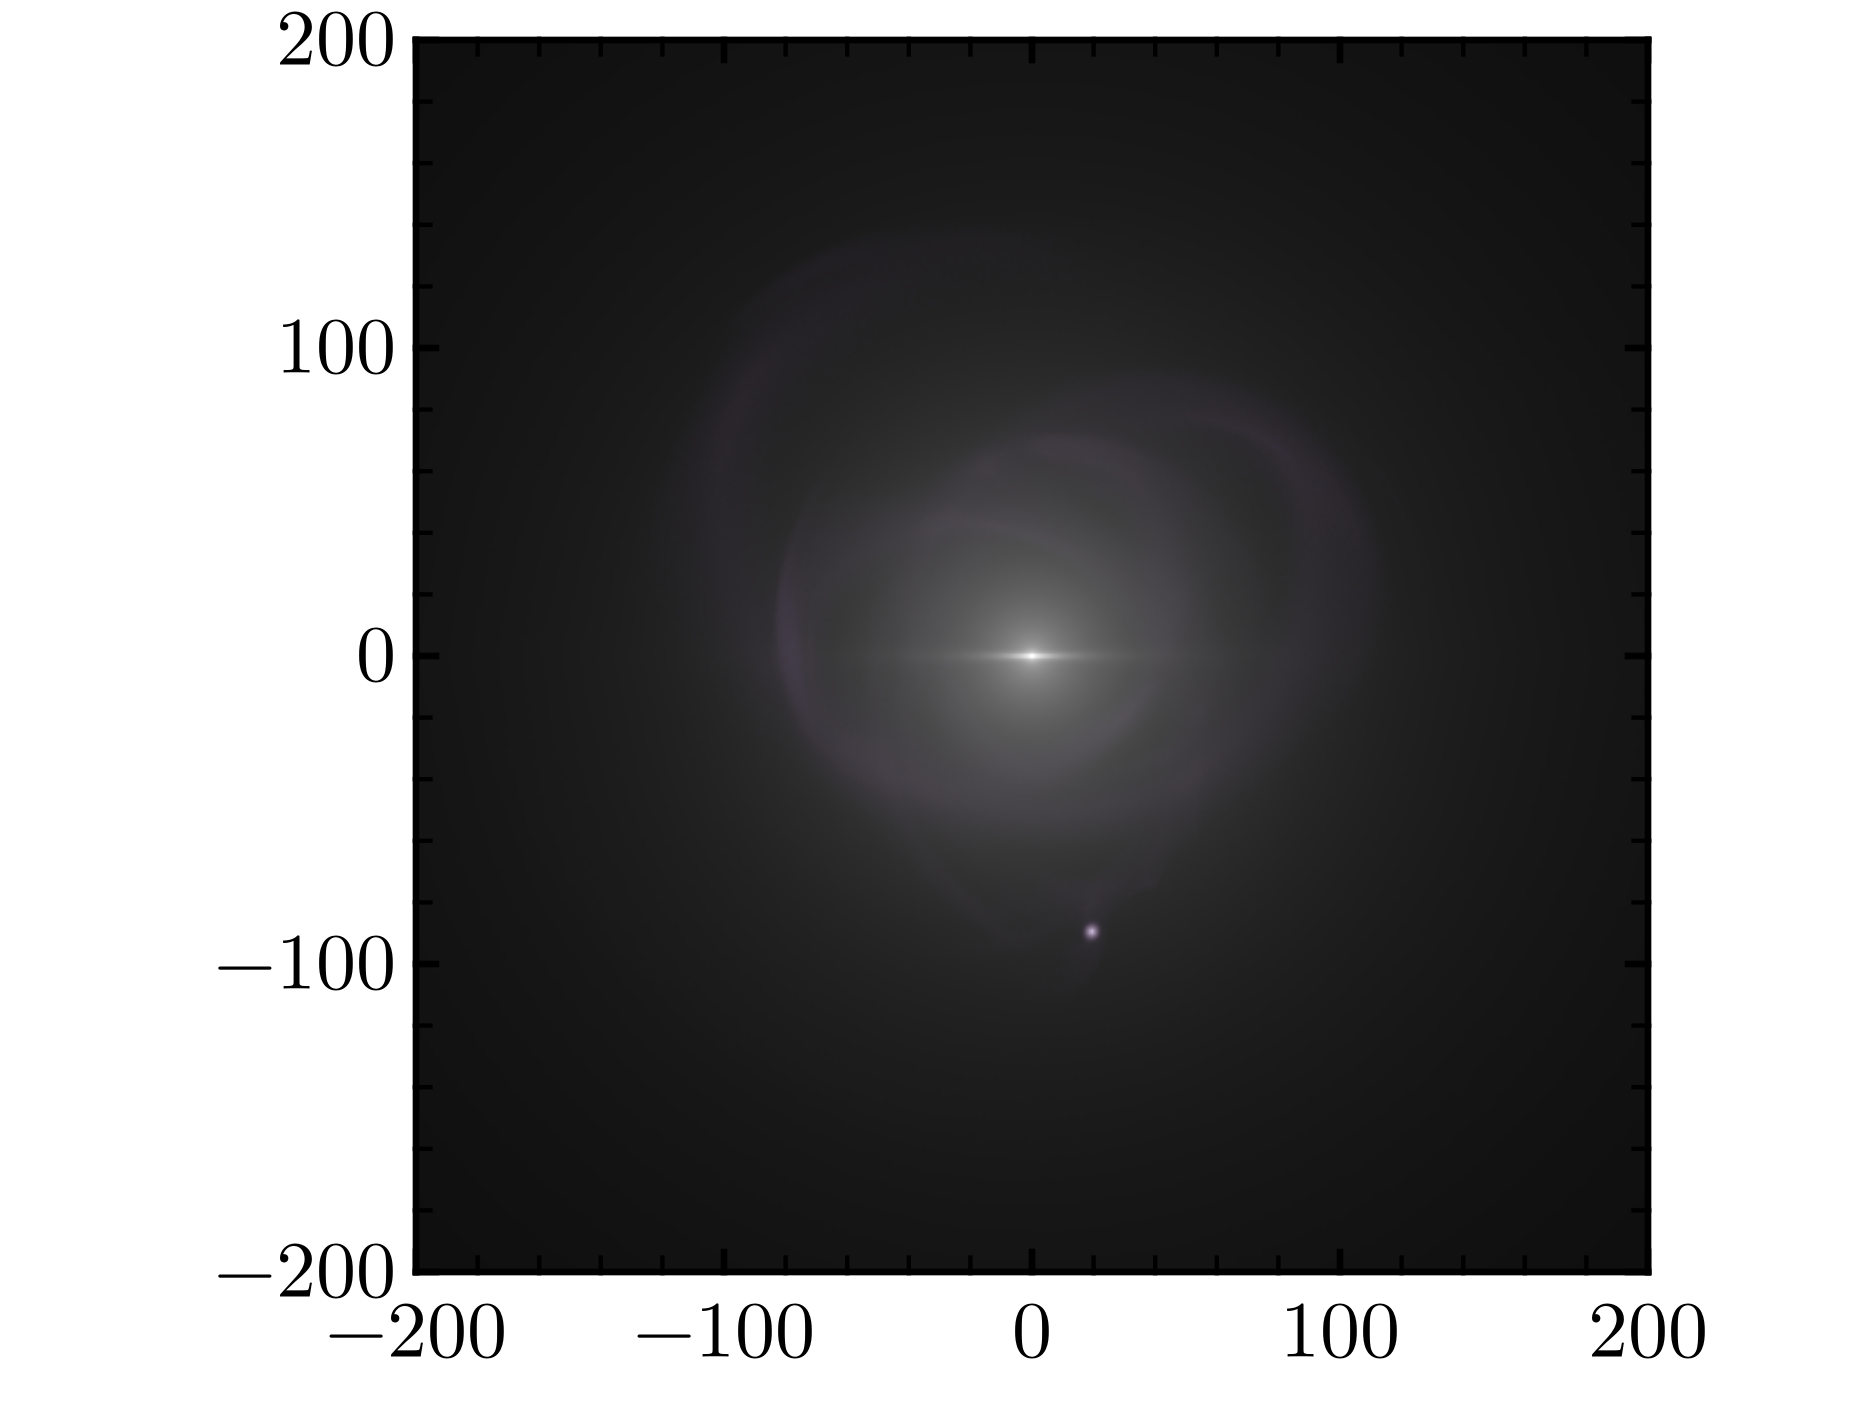

In [59]:
image(extrema(xbins), extrema(ybins), combine_densities([h, Σ_disk,], [dm_color, white, orange], dm_power=0.5), axis=(;aspect=DataAspect()))

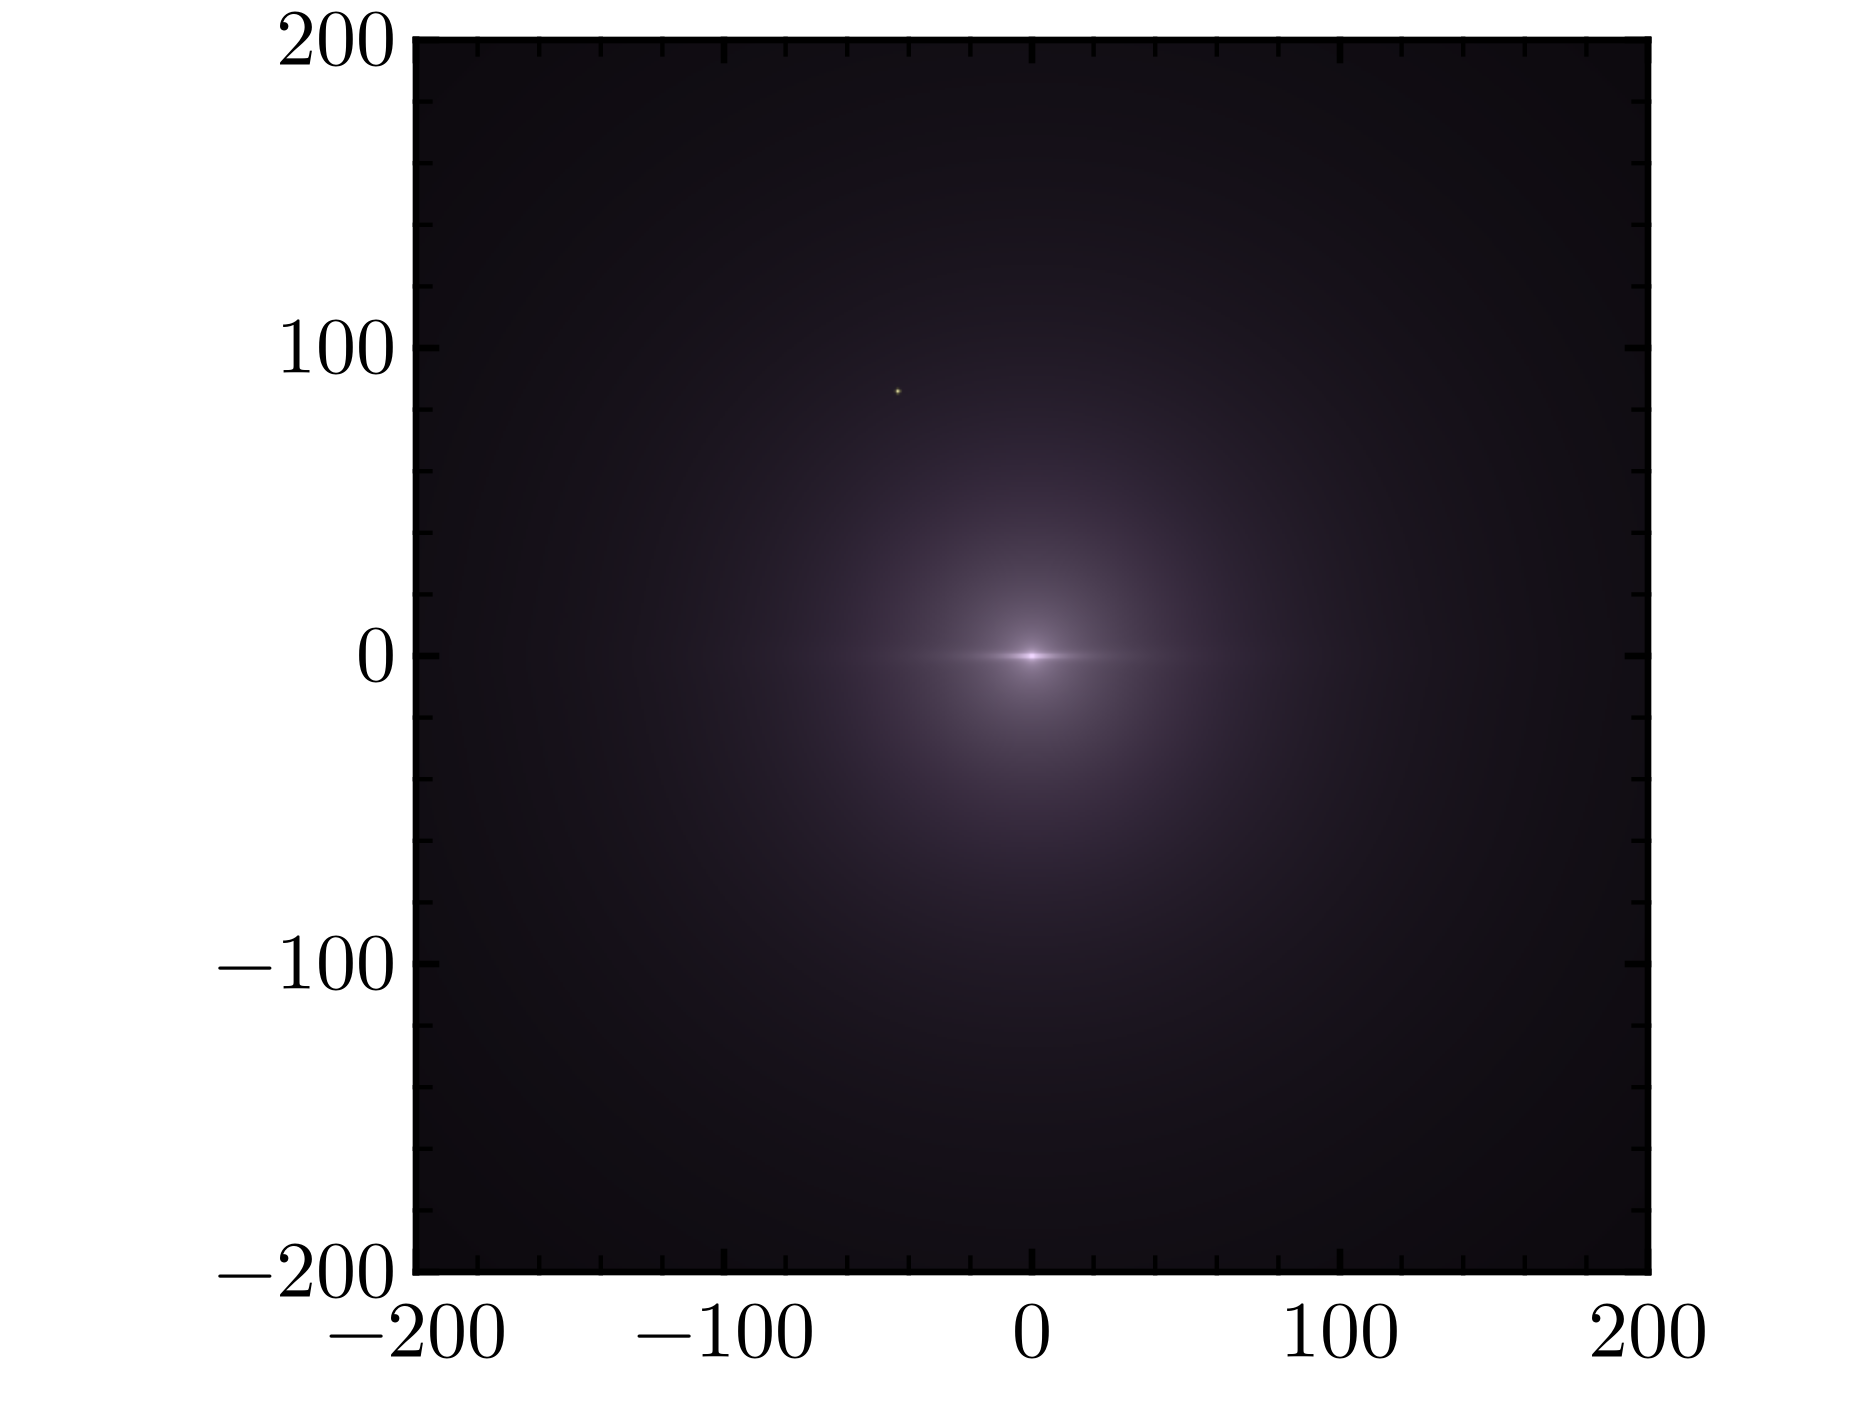

In [64]:
image(extrema(xbins), extrema(ybins), combine_densities([Σ_disk, hs_0], Makie.RGBA{Float32}[dm_color, yellow, yellow], dm_power=0.5), axis=(;aspect=DataAspect()))